In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
df = pd.read_csv("cvpr_data_with_topics.csv")
df.head(1)

,title,authors,abstract,link,year,citation_count,doi,citation,title_open_cite,topic_class
0,Deformable Spatial Pyramid Matching for Fast D...,"Jaechul Kim, Ce Liu, Fei Sha, Kristen Grauman",We introduce a fast deformable spatial pyramid...,content_cvpr_2013/papers/Kim_Deformable_Spatia...,2013,120,10.1109/cvpr.2013.299,10.1007/978-3-030-01249-6_36; 10.2493/jjspe.84...,deformable spatial pyramid matching for fast d...,0


# Topic statistics
Get statistics for each year separately

In [14]:
topic_stats = []
years = df["year"].unique()
for year in years:
    topic_stats.append(df[df["year"] == year].groupby("topic_class")["citation_count"].describe())

topic_stats[0]

,count,mean,std,min,25%,50%,75%,max
topic_class,,,,,,,,
0,102.0,45.862745,58.160079,0.0,9.00,23.0,56.50,287.0
1,32.0,103.875000,192.336525,6.0,17.00,34.0,83.25,869.0
2,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
3,16.0,51.687500,51.768354,5.0,13.00,41.0,55.75,180.0
4,7.0,28.285714,13.622460,17.0,17.50,19.0,39.00,49.0
5,27.0,46.037037,37.068006,1.0,13.00,46.0,68.00,126.0
6,16.0,65.750000,53.791573,17.0,32.00,47.5,64.50,213.0
7,6.0,37.833333,32.387755,10.0,18.00,24.0,49.50,95.0
8,4.0,69.250000,45.389977,4.0,55.75,85.0,98.50,103.0


Paper count for each topic and year

In [15]:
n_topics = len(df.topic_class.unique())
counts = np.zeros((n_topics, len(years)))
for i in range(len(years)):
    inds = topic_stats[i].index.values
    counts[inds,i] = topic_stats[i]["count"].to_numpy()

We need to get topic elements to properly label plots

In [16]:
# import saved model
import pickle

with open("model\\nmf.pickle", "rb") as f:
    nmf = pickle.load(f)

with open("model\\tfidf_vectorizer.pickle", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(tfidf_feature_names)

['2d' '2d 3d' '3d' '3d face' '3d hand' '3d human' '3d object' '3d point'
 '3d pose' '3d reconstruction' '3d scene' '3d semantic' '3d shape' '4d'
 '6d' '6d object' 'accuracy' 'action' 'action detection'
 'action localization' 'action recognition' 'action segmentation'
 'action unit' 'actions' 'activation' 'active' 'active learning'
 'activities' 'activity' 'activity recognition' 'adaptation' 'adaptive'
 'adversarial' 'adversarial attacks' 'adversarial examples'
 'adversarial learning' 'adversarial network' 'adversarial networks'
 'adversarial robustness' 'aerial' 'affinity' 'age' 'agent' 'aggregation'
 'agnostic' 'aligned' 'alignment' 'analysis' 'anchor' 'annotation'
 'annotations' 'anomaly' 'anomaly detection' 'answering' 'anti'
 'appearance' 'application' 'applications' 'approximate' 'arbitrary'
 'architecture' 'architecture search' 'architectures' 'articulated'
 'assessment' 'association' 'attack' 'attacks' 'attention'
 'attention network' 'attentive' 'attribute' 'attributes' 'audio'

Get topic names

In [17]:
topic_names = []
for topic_idx, topic in enumerate(nmf.components_):
    top_features_ind = topic.argsort()[: -2 - 1 : -1]
    top_features = [tfidf_feature_names[i] for i in top_features_ind]
    topic_names.append("+".join(top_features))

topic_names[0]

'learning+unsupervised'

Sort topics based on total number of papers

In [18]:
paper_count = counts.sum(axis=1)
top_topic_inds = paper_count.argsort()[::-1]
top_topic_inds

array([ 0,  1,  5,  2,  7, 15, 10,  3, 31,  6, 23, 24, 18, 17, 22, 28,  4,
       12, 13, 20,  8,  9, 19, 38, 11, 34, 21, 16, 27, 32, 30, 33, 39, 25,
       26, 37, 36, 14, 35, 29], dtype=int64)

Plot top 5 topics as a function of time

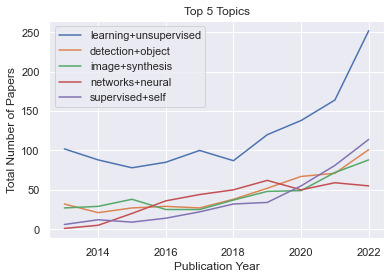

In [19]:
plt.figure()
for i in range(5):
    plt.plot(years, counts[top_topic_inds[i],:], label=topic_names[top_topic_inds[i]])
plt.ylabel("Total Number of Papers")
plt.xlabel("Publication Year")
plt.title("Top 5 Topics")
plt.legend()
plt.show()

In [20]:
tot_paper_count = df.groupby("year")["year"].count()
tot_paper_count

year
2013     471
2014     540
2015     602
2016     643
2017     783
2018     979
2019    1294
2020    1466
2021    1660
2022    2074
Name: year, dtype: int64

There is a general increase in the total number of papers each year so normalize paper for each year by the total number of papers that year

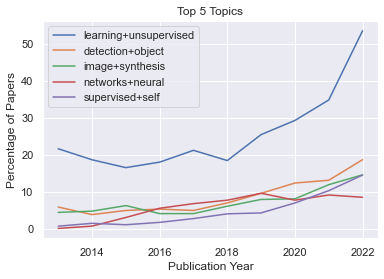

In [24]:
plt.figure()
for i in range(5):
    plt.plot(years, 100*counts[top_topic_inds[i],:]/tot_paper_count.iloc[i], label=topic_names[top_topic_inds[i]])
plt.ylabel("Percentage of Papers")
plt.xlabel("Publication Year")
plt.title("Top 5 Topics")
plt.legend(loc="upper left")
plt.show()

Learning based approaches are known to work well so we can skip that topic

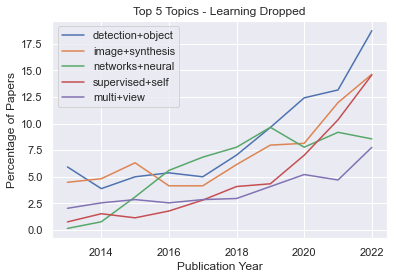

In [23]:
plt.figure()
for i in range(1,6):
    plt.plot(years, 100*counts[top_topic_inds[i],:]/tot_paper_count.iloc[i], label=topic_names[top_topic_inds[i]])
plt.ylabel("Percentage of Papers")
plt.xlabel("Publication Year")
plt.title("Top 5 Topics - Learning Dropped")
plt.legend(loc="upper left")
plt.show()

Topics with the greatest change

In [42]:
norm_counts = counts/tot_paper_count.to_numpy().reshape(1,-1)
norm_counts.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
dpdt = np.diff(norm_counts, axis=1)
print(list(zip(list(np.arange(0,n_topics,1)), topic_names, list(dpdt[:,-1]))))

[(0, 'learning+unsupervised', 0.022709158717802755), (1, 'detection+object', 0.005927083454357447), (2, 'networks+neural', -0.009023364431690117), (3, 'pose+estimation', 0.000974776637891972), (4, 'semantic+semantic segmentation', 0.011822797457912655), (5, 'image+synthesis', -0.0009434071870897259), (6, 'recognition+action', -0.0050504815791613915), (7, 'supervised+self', 0.006171068071708238), (8, 'domain+adaptation', -0.011555576210337978), (9, '3d+reconstruction', 0.004709484030625877), (10, 'visual+question', -0.006613725877473251), (11, 'person+identification', -0.0040896469194037464), (12, 'video+video object', 0.0096524961950018), (13, 'deep+deep learning', -0.004451557435140757), (14, 'end+end end', 0.0007307920205411808), (15, 'multi+view', 0.008933322489572567), (16, 'resolution+super', -0.001074113232099081), (17, 'point+cloud', 0.0013401726481625659), (18, 'adversarial+generative', -0.0026396811934333297), (19, 'shot+zero', 0.007361945370682344), (20, 'network+neural netwo

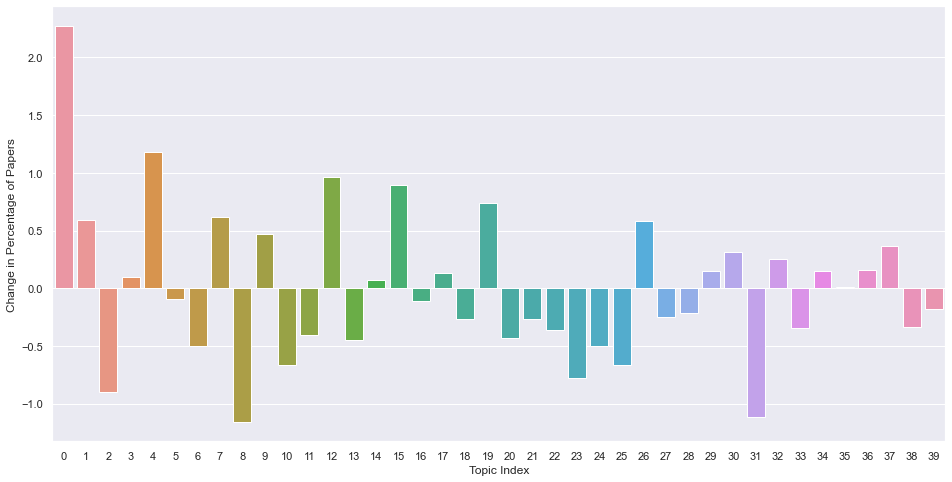

In [55]:
plt.figure(figsize=(16,8))
sns.barplot(x = np.arange(0,n_topics,1), y=100*dpdt[:,-1])
plt.xlabel("Topic Index")
plt.ylabel("Change in Percentage of Papers")
plt.show()